#⑴ ライブラリの読み込み

In [ ]:
import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot
import japanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from scipy import stats

from google.colab import files

#⑵ データの読み込み

In [ ]:
#データの読み込み

JHPS2009 = pd.read_csv('JHPS2009data_ver8.0.csv', header=None)
JHPS2010 = pd.read_csv('JHPS2010data_ver8.0.csv', header = None)
JHPS2011 = pd.read_csv('JHPS2011data_ver8.0.csv', header = None)
JHPS2012 = pd.read_csv('JHPS2012data_ver8.0.csv', header = None)
JHPS2013 = pd.read_csv('JHPS2013data_ver8.0.csv', header = None)
JHPS2014 = pd.read_csv('JHPS2014data_ver8.0.csv', header = None)
JHPS2015 = pd.read_csv('JHPS2015data_ver8.0.csv', header = None)
JHPS2016 = pd.read_csv('JHPS2016data_ver7.0.csv', header = None)
JHPS2017 = pd.read_csv('JHPS2017data_ver6.0.csv', header = None)
JHPS2018 = pd.read_csv('JHPS2018data_ver5.0.csv', header = None)
JHPS2019 = pd.read_csv('JHPS2019data_ver4.0.csv', header = None)
JHPS2020 = pd.read_csv('JHPS2020data_ver3.0.csv', header = None)
JHPS2021 = pd.read_csv('JHPS2021data_ver2.0.csv', header = None)

JHPSs = [JHPS2009, JHPS2010, JHPS2011, JHPS2012, JHPS2013, JHPS2014, JHPS2015, JHPS2016, JHPS2017, JHPS2018, JHPS2019, JHPS2020, JHPS2021]

<ipython-input-3-e42a003bfdd9>:4: DtypeWarning: Columns (852) have mixed types. Specify dtype option on import or set low_memory=False.
  JHPS2010 = pd.read_csv('JHPS2010data_ver8.0.csv', header = None)


In [ ]:
#質問ナンバー
NA = 'NA'

Q2009 = {'転職希望':200,
         '週平均残業':182, 'フレックス':179, '短時間勤務あり':193, '在宅勤務あり':194, '半休あり':195, '社内公募あり':197,
         '勤務年数':167, '性別':5, '年齢':6, '最終学歴':142, '正規雇用':160, '本人収入':170,
         '配偶者あり':4, '配偶者収入':303, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2010 = {'転職希望':229,
         '週平均残業':207, 'フレックス':204, '短時間勤務あり':222, '在宅勤務あり':223, '半休あり':224, '社内公募あり':226,
         '勤務年数':231, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':189, '本人収入':197,
         '配偶者あり':4, '配偶者収入':818, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2011 = {'転職希望':217,
         '週平均残業':201, 'フレックス':198, '短時間勤務あり':210, '在宅勤務あり':211, '半休あり':212, '社内公募あり':214,
         '勤務年数':219, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':183, '本人収入':191,
         '配偶者あり':4, '配偶者収入':404, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2012 = {'転職希望':238,
         '週平均残業':222, 'フレックス':219, '短時間勤務あり':231, '在宅勤務あり':232, '半休あり':233, '社内公募あり':235,
         '勤務年数':240, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':204, '本人収入':212,
         '配偶者あり':4, '配偶者収入':442, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2013 = {'転職希望':232,
         '週平均残業':216, 'フレックス':213, '短時間勤務あり':225, '在宅勤務あり':226, '半休あり':227, '社内公募あり':229,
         '勤務年数':234, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':198, '本人収入':206,
         '配偶者あり':4, '配偶者収入':471, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2014 = {'転職希望':263,
         '週平均残業':253, 'フレックス':250, '短時間勤務あり':256, '在宅勤務あり':257, '半休あり':258, '社内公募あり':260,
         '勤務年数':265, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':234, '本人収入':243,
         '配偶者あり':4, '配偶者収入':521, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2015 = {'転職希望':235,
         '週平均残業':225, 'フレックス':222, '短時間勤務あり':228, '在宅勤務あり':229, '半休あり':230, '社内公募あり':232,
         '勤務年数':237, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':206, '本人収入':215,
         '配偶者あり':4, '配偶者収入':495, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2016 = {'転職希望':306,
         '週平均残業':296, 'フレックス':293, '短時間勤務あり':299, '在宅勤務あり':300, '半休あり':301, '社内公募あり':303,
         '勤務年数':308, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':277, '本人収入':286,
         '配偶者あり':4, '配偶者収入':636, '家族1人目続柄':11, '家族Q個数':10, '最大家族':9}
Q2017 = {'転職希望':710,
         '週平均残業':700, 'フレックス':697, '短時間勤務あり':703, '在宅勤務あり':704, '半休あり':705, '社内公募あり':707,
         '勤務年数':712, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':681, '本人収入':690,
         '配偶者あり':4, '配偶者収入':1048, '家族1人目続柄':26, '家族Q個数':19, '最大家族':24}
Q2018 = {'転職希望':646,
         '週平均残業':636, 'フレックス':633, '短時間勤務あり':639, '在宅勤務あり':640, '半休あり':641, '社内公募あり':643,
         '勤務年数':648, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':617, '本人収入':626,
         '配偶者あり':4, '配偶者収入':1061, '家族1人目続柄':28, '家族Q個数':20, '最大家族':27}
Q2019 = {'転職希望':857,
         '週平均残業':847, 'フレックス':844, '短時間勤務あり':850, '在宅勤務あり':851, '半休あり':852, '社内公募あり':854,
         '勤務年数':914, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':828, '本人収入':837,
         '配偶者あり':4, '配偶者収入':1543, '家族1人目続柄':28, '家族Q個数':20, '最大家族':26}
Q2020 = {'転職希望':658,
         '週平均残業':648, 'フレックス':645, '短時間勤務あり':651, '在宅勤務あり':652, '半休あり':653, '社内公募あり':655,
         '勤務年数':715, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':629, '本人収入':638,
         '配偶者あり':4, '配偶者収入':1134, '家族1人目続柄':40, '家族Q個数':20, '最大家族':26}
Q2021 = {'転職希望':655,
         '週平均残業':641, 'フレックス':638, '短時間勤務あり':648, '在宅勤務あり':649, '半休あり':650, '社内公募あり':652,
         '勤務年数':1212, '性別':5, '年齢':6, '最終学歴':NA, '正規雇用':622, '本人収入':631,
         '配偶者あり':4, '配偶者収入':1131, '家族1人目続柄':32, '家族Q個数':20, '最大家族':26}

Qs = [Q2009, Q2010, Q2011, Q2012, Q2013, Q2014, Q2015, Q2016, Q2017, Q2018, Q2019, Q2020, Q2021]

#⑶ データクリーニング

##DataFrame

In [ ]:
DataFrames = []
for JHPS in JHPSs:
    x = pd.DataFrame({}, index=range(len(JHPS)))
    DataFrames.append(x)
#print(DataFrames)

tensyoku_sum = []
tensyoku_ave = []
DataFrames2 = []

for t in range(len(Qs)):

    #転職する意思
    tensyoku = []
    for i in JHPSs[t][Qs[t]['転職希望'] -1]:
        if i == 3:
            tensyoku.append(1)
        else: tensyoku.append(0)
    tensyoku_sum.append(sum(tensyoku))
    tensyoku_ave.append(sum(tensyoku)/len(tensyoku))

    #週平均残業時間
    zangyou = []
    for i in JHPSs[t][Qs[t]['週平均残業'] -1]:
        if i < 888:
            zangyou.append(i)
        else: zangyou.append(0)

    #フレックス勤務D
    flex = []
    for i in JHPSs[t][Qs[t]['フレックス'] -1]:
        if i == 2:
            flex.append(1)
        else : flex.append(0)

    #短時間勤務制度ダミー
    tanjikan = []
    for i in JHPSs[t][Qs[t]['短時間勤務あり'] -1]:
        if i == 2 or i ==3:
            tanjikan.append(1)
        else : tanjikan.append(0)

    #在宅勤務制度ダミー
    zaitaku = []
    for i in JHPSs[t][Qs[t]['在宅勤務あり'] -1]:
        if i == 2 or i ==3:
            zaitaku.append(1)
        else : zaitaku.append(0)

    #半休制度ダミー
    hankyu = []
    for i in JHPSs[t][Qs[t]['半休あり'] -1]:
        if i == 2 or i ==3:
            hankyu.append(1)
        else : hankyu.append(0)

    #社内公募制度ダミー
    koubo = []
    for i in JHPSs[t][Qs[t]['社内公募あり'] -1]:
        if i == 2 or i ==3:
            koubo.append(1)
        else : koubo.append(0)

    #男性ダミー
    male = []
    for i in JHPSs[t][Qs[t]['性別'] -1]:
        if i == 1:
            male.append(1)
        else : male.append(0)

    #本人年齢
    age = list(2009 - JHPSs[t][Qs[t]['年齢'] -1])

    #293: 本人正規雇用
    seiki = []
    for i in JHPSs[t][Qs[t]['正規雇用'] -1]:
        if 1<=i<=3:
            seiki.append(1)
        else: seiki.append(0)

    #170: 本人収入(昨年)
    wage = []
    for i in JHPSs[t][Qs[t]['本人収入'] -1]:
        if i < 88888:
            wage.append(i)
        else: wage.append(0)

    #4: 配偶者ダミー
    spose = []
    for i in JHPSs[t][Qs[t]['配偶者あり'] -1]:
        if i ==1:
            spose.append(1)
        else: spose.append(0)

    #302: 配偶者収入(昨年)
    wage2 = []
    for i in JHPSs[t][Qs[t]['配偶者収入'] -1]:
        if i < 88888:
            wage2.append(i)
        else: wage2.append(0)

    #一人当たり世帯収入
    wage_all = [wage[i] + wage2[i] for i in range(len(wage))]
    len(wage)
    wage_person = [wage_all[i]/(1+spose[i]) for i in range(len(wage_all))]

    #子の人数
    #'家族1人目続柄':11, '家族Q個数':10, '最大家族':9
    tuzukigara_q = [Qs[t]['家族1人目続柄']+i*Qs[t]['家族Q個数'] for i in range(Qs[t]['家族Q個数']-1)]
    tuzukigara = JHPSs[t].iloc[:, tuzukigara_q]
    tuzukigara['配偶者D'] = spose

    #謎のエラー解消できず…
    tuzukigara2 = []
    for row in tuzukigara.itertuples(name=None):
        tuzukigara2.append(row)

    children = []
    for row in tuzukigara2:
        if row[-1]==1:
            count = 0
            for i in row:
                if i == 2:
                    count += 1
            children.append(count)
        else:
            if row[-1]==0:
                count = 0
                for i in row:
                    if i == 1:
                        count += 1
                children.append(count)

    df = DataFrames[t]
    df['id'] = [i for i in JHPSs[t][0]]
    df['年'] = t
    df['転職希望D'] = tensyoku
    df['週平均残業'] = zangyou
    df['フレックスD'] = flex
    df['短時間勤務D'] = tanjikan
    df['在宅勤務D'] = zaitaku
    df['半休D'] = hankyu
    df['社内公募D'] = koubo
    df['男性D'] = male
    df['本人年齢'] = age
    df['正規D'] = seiki
    df['本人収入'] = wage
    df['配偶者D'] = spose
    df['一人当たり収入'] = wage_person
    df['子の人数'] = children

    wage_no = df.columns.get_loc('本人収入')
    for i in range(len(df)):
      if df.iat[i, wage_no] == 0:
        df.iat[i, wage_no] = None

    df = df.dropna()

    DataFrames2.append(df)

#残業 t=10
#フレックス t=10
#制度D t=10
#正規D t=7, t=10
#本人収入 t=10
#一人当たり収入 t=10
#子の人数 t=8以降

#t=10: 2018

<ipython-input-5-f98836203fcf>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuzukigara['配偶者D'] = spose
<ipython-input-5-f98836203fcf>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuzukigara['配偶者D'] = spose
<ipython-input-5-f98836203fcf>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

##勤務年数

In [ ]:

#勤務年数5~15年の人に絞り込む 931名
#df2 = df[(5 < df['勤務年数']) & (df['勤務年数'] < 15)]
#DataFrames2.append(df)
#勤務年数5~15年の人の中で転職を希望する人数 121名
#print(len(df2[df2['転職希望D'] == 1]))

list_df_kinmu = []

for t in range(len(Qs)):
    df_kinmu = pd.DataFrame()
    id = JHPSs[t][0]
    if t==0:
        kinmu = JHPSs[t][Qs[t]['勤務年数']-1]
    if t>0:
        kinmu = []
        for data in JHPSs[t][Qs[t]['勤務年数']-1]:
            if data == any([1,2,3,7]): kinmu.append(1)
            else: kinmu.append(0)
    df_kinmu['id']=id
    df_kinmu['勤務年数']=kinmu
    list_df_kinmu.append(df_kinmu)

#2009勤務年数+2010~継続D
df_kinmu2 = list_df_kinmu[0]
for t in range(len(Qs)-1):
    df_kinmu2 = pd.merge(df_kinmu2, list_df_kinmu[t+1], on='id', how='inner', suffixes=[t+1, t+2])

for row in range(len(df_kinmu2)):
    if df_kinmu2['勤務年数1'][row] >= 8888:
        df_kinmu2['勤務年数1'][row] = 0
    else: df_kinmu2['勤務年数1'][row] = 2009 - df_kinmu2['勤務年数1'][row]

#勤務年数
for id in range(len(df_kinmu2)):
    for t in range(13):
        if t == 0:
            df_kinmu2.iloc[id, t+1] = df_kinmu2.iloc[id, t+1]
        if t > 0:
            if df_kinmu2.iloc[id, t+1] == 1:
              df_kinmu2.iloc[id, t+1] = df_kinmu2.iloc[id, t] + 1

for t in range(13):
    df1 = df_kinmu2['id']
    df2 = df_kinmu2.iloc[:,t+1]
    df = pd.concat([df1, df2], axis=1)
    DataFrames2[t] = pd.merge(df, DataFrames2[t], how='inner', on='id')

#⑷ 記述統計（実行しなくてok）

In [ ]:
for i in range(12):
  print(DataFrames2[i].describe())
  print(DataFrames2[i].isna().sum())

                 id       勤務年数1      年       転職希望D       週平均残業      フレックスD  \
count    896.000000  896.000000  896.0  896.000000  896.000000  896.000000   
mean   22671.503348   12.348214    0.0    0.092634    2.821429    0.099330   
std     1708.849521   11.794770    0.0    0.290081    5.723950    0.299272   
min    20003.000000    0.000000    0.0    0.000000    0.000000    0.000000   
25%    21043.250000    3.000000    0.0    0.000000    0.000000    0.000000   
50%    22610.500000    8.000000    0.0    0.000000    0.000000    0.000000   
75%    24203.750000   19.000000    0.0    0.000000    3.000000    0.000000   
max    26092.000000   53.000000    0.0    1.000000   50.000000    1.000000   

           短時間勤務D       在宅勤務D         半休D       社内公募D         男性D        本人年齢  \
count  896.000000  896.000000  896.000000  896.000000  896.000000  896.000000   
mean     0.226562    0.043527    0.373884    0.154018    0.581473   46.075893   
std      0.418841    0.204154    0.484104    0.361167 

##記述統計量

In [ ]:
for i in range(17):
    print('　【', DataFrames2[0].columns.values[i], '】　')
    for t in range(len(Qs)):
        print('t=', t,
            '平均:', DataFrames2[t].iloc[:,i].mean(),
            '分散:', DataFrames2[t].iloc[:,i].var(),
            '最大:', DataFrames2[t].iloc[:,i].max(),
            '最小:', DataFrames2[t].iloc[:,i].min())

　【 id 】　
t= 0 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 1 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 2 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 3 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 4 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 5 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 6 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 7 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 8 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 9 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 10 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 11 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
t= 12 平均: 22545.583720930234 分散: 2863785.859936493 最大: 26092 最小: 20002
　【 勤務年数1 】　
t= 0 平均: 9.084496124031007 分散: 132.9463071547561 最大: 53 最小: 0
t= 1

TypeError: can only concatenate str (not "int") to str

##可視化

In [ ]:
dataset1 = pd.DataFrame()
dataset2 = pd.DataFrame()

t = 12

for i in range(len(DataFrames2[t])):
  if DataFrames2[0].iloc[i, 3]==1:
    dataset1 = pd.concat([dataset1, DataFrames2[t].iloc[i, :]], axis=1)
  else:
    dataset2 = pd.concat([dataset2, DataFrames2[t].iloc[i, :]], axis=1)

In [ ]:
dataset1 = dataset1.T
dataset2 = dataset2.T

figure = pyplot.figure(figsize=(12, 12), dpi=100)

labels = []
for row in DataFrames2[0]:
  labels.append(row)

for i in range(16):
  axes = figure.add_subplot(4, 4, i+1)
  pyplot.title(labels[i])
  axes.hist(dataset2.iloc[:, i], bins=15, rwidth=0.8, stacked=True)
  axes.hist(dataset1.iloc[:, i], bins=15, rwidth=0.8, stacked=True)

#⑸ 回帰分析

In [ ]:
to_drop = ['転職希望D', 'id', '年', 'フレックスD', '社内公募D', '一人当たり収入']

labels = []
for row in DataFrames2[0].drop(to_drop, axis=1):
  labels.append(row)

labels2 = [i+2009 for i in range(13)]

scores = []
coefficients = []
DataFrame3 = pd.DataFrame()
DataFrame4 = pd.DataFrame()

for t in range(10):
  X = DataFrames2[t].drop(to_drop, axis=1)
  y = DataFrames2[t]['転職希望D']

  model = LinearRegression()
  #model = LogisticRegression(class_weight='balanced')
  model.fit(X, y)

  y_hat = model.predict(X)

  sse = (y - y_hat) **2
  sse = np.sum(sse, axis=0)
  sse = sse / (X.shape[0] - X.shape[1] -1 )

  X_tmp = (X - X.mean(axis=0))
  s = np.dot(X_tmp.T, X_tmp)
  s = np.linalg.inv(s)

  std_err = np.sqrt(np.diagonal(sse * s))
  print(std_err)

  #回帰係数をまとめたDataFrame3
  df2= pd.DataFrame(model.coef_.T,
                   index = labels,
                   columns = [labels2[t]])
  DataFrame3 = pd.concat([DataFrame3, df2], axis=1)

  #t値をまとめたDataFrame4
  list_t = []
  for i in range(len(std_err)):
    list_t.append(model.coef_[i]/std_err[i])

  df3= pd.DataFrame(list_t,
                   index = labels,
                   columns = [labels2[t]])
  DataFrame4 = pd.concat([DataFrame4, df2], axis=1)

[9.85027733e-04 1.85465397e-03 2.48858343e-02 4.77454467e-02
 2.27050236e-02 2.40923500e-02 9.44304112e-04 2.46593370e-02
 4.29430988e-05 2.36194003e-02 9.45832379e-03]
[9.24096369e-04 1.77155653e-03 2.35813290e-02 4.31368252e-02
 2.27462889e-02 2.36429866e-02 9.02167507e-04 2.40103793e-02
 3.88266476e-05 2.31779332e-02 9.22927098e-03]
[9.82440722e-04 1.70387049e-03 2.51929205e-02 4.64291810e-02
 2.44405201e-02 2.54731827e-02 9.67071846e-04 2.70693598e-02
 4.86578991e-05 2.46690185e-02 9.37321790e-03]
[9.39047887e-04 1.70659592e-03 2.44694934e-02 4.42153121e-02
 2.33410726e-02 2.50221872e-02 9.37978948e-04 2.65998067e-02
 4.48034554e-05 2.43354327e-02 9.76286212e-03]
[9.06337846e-04 1.86025368e-03 2.37694455e-02 4.46776832e-02
 2.36277655e-02 2.34509437e-02 8.87694562e-04 2.48978068e-02
 4.38452490e-05 2.27436051e-02 9.05999264e-03]
[1.01189622e-03 1.90933841e-03 2.67844501e-02 5.23572790e-02
 2.56160839e-02 2.66810351e-02 1.01568869e-03 2.86834137e-02
 5.35852105e-05 2.57164257e-02 1.

In [ ]:
#男性D=1のみ

to_drop = ['転職希望D', 'id', '年', '男性D', 'フレックスD', '社内公募D', '一人当たり収入']

labels_male = []
for row in DataFrames2[0].drop(to_drop, axis=1):
  labels_male.append(row)

print(labels_male)

labels2 = [i+2009 for i in range(13)]

scores = []
coefficients = []
DataFrame3_male = pd.DataFrame()
DataFrame4_male = pd.DataFrame()

DataFrames2_male = []
for t in range(13):
  DataFrames2_male.append(DataFrames2[t][DataFrames2[t]['男性D']==1])

for t in range(10):
  X_male = DataFrames2_male[t].drop(to_drop, axis=1)
  y_male = DataFrames2_male[t]['転職希望D']

  model_male = LinearRegression()
  #model = LogisticRegression(class_weight='balanced')
  model_male.fit(X_male, y_male)

  y_male_hat = model_male.predict(X_male)

  sse = (y_male - y_male_hat) **2
  sse = np.sum(sse, axis=0)
  sse = sse / (X_male.shape[0] - X_male.shape[1] -1 )

  X_male_tmp = (X_male - X_male.mean(axis=0))
  s = np.dot(X_male_tmp.T, X_male_tmp)
  s = np.linalg.inv(s)

  std_err = np.sqrt(np.diagonal(sse * s))
  print(std_err)

  #回帰係数をまとめたDataFrame3
  df2= pd.DataFrame(model_male.coef_.T,
                   index = labels_male,
                   columns = [labels2[t]])
  DataFrame3_male = pd.concat([DataFrame3_male, df2], axis=1)

  #t値をまとめたDataFrame4
  list_t = []
  for i in range(len(std_err)):
    list_t.append(model.coef_[i]/std_err[i])

  df3= pd.DataFrame(list_t,
                   index = labels_male,
                   columns = [labels2[t]])
  DataFrame4_male = pd.concat([DataFrame4_male, df2], axis=1)

['勤務年数1', '週平均残業', '短時間勤務D', '在宅勤務D', '半休D', '男性D', '本人年齢', '本人収入', '配偶者D', '子の人数']
[1.65679709e-03 2.04291681e-03 3.49804842e-02 6.71529294e-02
 3.05355460e-02 3.70861366e-02 1.55767745e-03 6.68154851e-05
 3.57702832e-02 1.36484674e-02]
[1.37674369e-03 1.90184694e-03 3.28789027e-02 5.77790197e-02
 2.97180690e-02 3.58428621e-02 1.42438405e-03 6.38385037e-05
 3.32567927e-02 1.29388454e-02]
[1.39210820e-03 1.76620541e-03 3.37822703e-02 5.42264583e-02
 3.22855489e-02 3.77062893e-02 1.50054136e-03 6.66525089e-05
 3.62461839e-02 1.31700930e-02]
[1.49237535e-03 1.86848985e-03 3.65684444e-02 5.78758582e-02
 3.44732151e-02 4.13590167e-02 1.63795556e-03 7.52520778e-05
 3.87326113e-02 1.50077690e-02]
[1.35397684e-03 2.06098122e-03 3.35292256e-02 5.44368131e-02
 3.30374394e-02 3.72976590e-02 1.48156464e-03 6.48447185e-05
 3.49751112e-02 1.34198323e-02]
[1.57661504e-03 2.24633711e-03 4.07280021e-02 7.22558612e-02
 3.71949425e-02 4.31257957e-02 1.73437024e-03 8.10206922e-05
 3.97415442e-02 1.521207

#⑹ 回帰係数について

##t値

In [ ]:
DataFrame4_male

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
勤務年数1,0.000043,-0.002075,-0.000900,-0.000557,-0.001256,-0.001052,0.000264,-0.000935,-0.001025,-0.002540
週平均残業,0.000440,-0.001302,0.001450,0.000218,0.003325,-0.001573,0.003498,0.002551,0.006314,0.005884
短時間勤務D,-0.012103,0.009977,0.001942,0.011420,0.036734,-0.051945,-0.033352,0.013571,0.031238,-0.039608
在宅勤務D,0.119184,0.012635,-0.099375,-0.089975,-0.014151,0.062853,-0.004797,-0.031393,0.084951,-0.055235
半休D,-0.059062,-0.081603,-0.022258,-0.043386,-0.088362,-0.052872,-0.012434,-0.062437,-0.084088,-0.050554
本人年齢,-0.002722,-0.000458,-0.002638,-0.004496,-0.002329,-0.004552,-0.002447,-0.001562,-0.002068,-0.003146
正規D,0.027538,0.050706,-0.003127,0.009132,0.002906,0.046711,0.013222,0.047965,0.058409,0.031463
本人収入,-0.000050,-0.000094,-0.000067,-0.000095,-0.000046,-0.000086,-0.000094,-0.000124,-0.000119,-0.000139
配偶者D,0.033673,-0.078058,-0.090468,-0.078341,-0.098636,-0.034037,-0.094223,-0.112312,-0.056603,-0.022362
子の人数,-0.015294,0.010718,-0.009906,-0.009988,0.007957,-0.008835,0.017636,0.011711,-0.006715,0.004549


In [ ]:
DataFrame4

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
勤務年数1,-0.000048,-0.001401,-0.000698,-0.001230,-0.001450,-0.000852,-0.001067,-0.001462,-0.001736,-0.002014
週平均残業,-0.000108,-0.000596,0.001398,0.000081,0.002420,-0.000233,0.002791,0.002749,0.004277,0.007443
短時間勤務D,0.008526,0.003322,0.013678,-0.011979,0.010835,-0.028449,-0.066926,0.005127,-0.000343,-0.036694
在宅勤務D,0.113959,-0.019800,-0.080899,-0.038218,-0.034132,0.032416,-0.015585,-0.000119,0.049863,-0.044265
半休D,-0.051093,-0.055945,-0.024988,-0.025582,-0.038747,-0.041608,0.007964,-0.078032,-0.021274,-0.016163
男性D,0.000802,0.045521,0.000793,0.045689,0.036478,0.042558,-0.000186,0.020685,-0.015571,0.019134
本人年齢,-0.003560,-0.001313,-0.003894,-0.003954,-0.002949,-0.004153,-0.003890,-0.003884,-0.004162,-0.004835
正規D,0.013386,0.013877,-0.022443,0.003826,-0.012174,0.040469,-0.021550,0.017061,0.027293,0.011407
本人収入,-0.000027,-0.000094,-0.000078,-0.000094,-0.000067,-0.000115,-0.000051,-0.000099,-0.000123,-0.000147
配偶者D,-0.022421,-0.035068,-0.078546,-0.060777,-0.068032,-0.052743,-0.090753,-0.078016,-0.029869,-0.004952


##回帰係数

In [ ]:
DataFrame3_male

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
勤務年数1,0.000043,-0.002075,-0.000900,-0.000557,-0.001256,-0.001052,0.000264,-0.000935,-0.001025,-0.002540
週平均残業,0.000440,-0.001302,0.001450,0.000218,0.003325,-0.001573,0.003498,0.002551,0.006314,0.005884
短時間勤務D,-0.012103,0.009977,0.001942,0.011420,0.036734,-0.051945,-0.033352,0.013571,0.031238,-0.039608
在宅勤務D,0.119184,0.012635,-0.099375,-0.089975,-0.014151,0.062853,-0.004797,-0.031393,0.084951,-0.055235
半休D,-0.059062,-0.081603,-0.022258,-0.043386,-0.088362,-0.052872,-0.012434,-0.062437,-0.084088,-0.050554
本人年齢,-0.002722,-0.000458,-0.002638,-0.004496,-0.002329,-0.004552,-0.002447,-0.001562,-0.002068,-0.003146
正規D,0.027538,0.050706,-0.003127,0.009132,0.002906,0.046711,0.013222,0.047965,0.058409,0.031463
本人収入,-0.000050,-0.000094,-0.000067,-0.000095,-0.000046,-0.000086,-0.000094,-0.000124,-0.000119,-0.000139
配偶者D,0.033673,-0.078058,-0.090468,-0.078341,-0.098636,-0.034037,-0.094223,-0.112312,-0.056603,-0.022362
子の人数,-0.015294,0.010718,-0.009906,-0.009988,0.007957,-0.008835,0.017636,0.011711,-0.006715,0.004549


In [ ]:
DataFrame3

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
勤務年数1,-0.000048,-0.001401,-0.000698,-0.001230,-0.001450,-0.000852,-0.001067,-0.001462,-0.001736,-0.002014
週平均残業,-0.000108,-0.000596,0.001398,0.000081,0.002420,-0.000233,0.002791,0.002749,0.004277,0.007443
短時間勤務D,0.008526,0.003322,0.013678,-0.011979,0.010835,-0.028449,-0.066926,0.005127,-0.000343,-0.036694
在宅勤務D,0.113959,-0.019800,-0.080899,-0.038218,-0.034132,0.032416,-0.015585,-0.000119,0.049863,-0.044265
半休D,-0.051093,-0.055945,-0.024988,-0.025582,-0.038747,-0.041608,0.007964,-0.078032,-0.021274,-0.016163
男性D,0.000802,0.045521,0.000793,0.045689,0.036478,0.042558,-0.000186,0.020685,-0.015571,0.019134
本人年齢,-0.003560,-0.001313,-0.003894,-0.003954,-0.002949,-0.004153,-0.003890,-0.003884,-0.004162,-0.004835
正規D,0.013386,0.013877,-0.022443,0.003826,-0.012174,0.040469,-0.021550,0.017061,0.027293,0.011407
本人収入,-0.000027,-0.000094,-0.000078,-0.000094,-0.000067,-0.000115,-0.000051,-0.000099,-0.000123,-0.000147
配偶者D,-0.022421,-0.035068,-0.078546,-0.060777,-0.068032,-0.052743,-0.090753,-0.078016,-0.029869,-0.004952


#出力


In [ ]:
to_drop = ['id', 'フレックスD', '社内公募D', '一人当たり収入']
df = pd.DataFrame()

for t in range(10):
  df1 = df
  df2 = DataFrames2[t].drop(to_drop, axis=1)
  df2 = df2.rename(columns={df2.columns.values[0]: '勤務年数'})
  #print(df2)
  df = pd.concat([df1, df2], axis=0, ignore_index=True)

#print(df)
#print(df.describe())

#df.to_csv("前処理後.csv")
#files.download("前処理後.csv")

#df.describe().to_csv("前処理後基本統計量.csv")
#files.download("前処理後基本統計量.csv")

In [ ]:
#DataFrame3_male.to_csv("回帰係数(正規).csv")
#files.download("回帰係数(正規).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#DataFrame3.to_csv("回帰係数(全体).csv")
#files.download("回帰係数(全体).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#不要

IndexError: index 11 is out of bounds for axis 0 with size 11

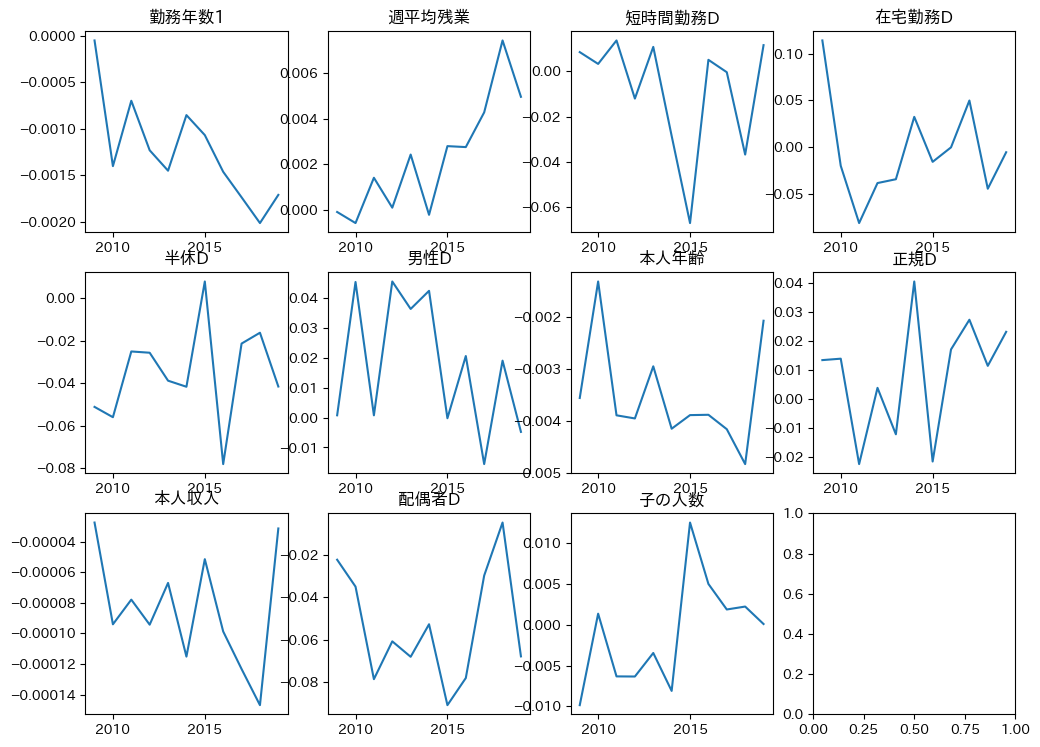

In [ ]:
dataset3 = DataFrame3

figure = pyplot.figure(figsize=(12, 12), dpi=100)

labels = DataFrame3.index

for i in range(14):
  axes = figure.add_subplot(4, 4, i+1)
  pyplot.title(labels[i])
  axes.plot(dataset3.iloc[i, :11]) #2019まで